<b> Playstore analysis 
    
   <b> Submitted by:
    
 <b> KALAIYARASAN DASS

<b>Import Library and Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


import gc
import datetime

%matplotlib inline


In [7]:
df = pd.read_csv(r'C:\Users\kalai\Downloads\Python Assignment 2_BI\playstore-analysis (2) (1).csv')



In [8]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [11]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


<b>1.Data Cleanning – Missing value treatment
    
a-->Drop records where rating is missing since rating is our target/study variable

In [13]:
print(f"Missing Values :\n{df.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [14]:
data1=df.dropna(subset=['Rating'])

In [15]:
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


<b>b-->Check the null values for the Android Ver column.

In [16]:
print(f"Missing Values :\n{data1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [17]:
print (data1[data1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

In [18]:
data2 = data1.drop(10472)
verify = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [19]:
import statistics
Android_list = data2['Android Ver'].to_list()
Al=[4.2,1.5,4.0,4.0]
data2_new = data2.fillna(statistics.mode(Al))

print(data2_new.loc[[4453]])
print('--------------------------------------------------------------------')
print(data2_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  
--------------------------------------------------------------------
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


<b>c. Current ver – replace with most common value

<b>2. Data clean up – correcting the data types
    
a. Which all variables need to be brought to numeric types?

In [20]:
print(f"Missing Values :{data2_new['Current Ver'].isnull().sum()}")

Missing Values :0


In [21]:
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)
data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')

<b>b. Price variable – remove $ sign and convert to float

In [23]:
data2_new['Price'] = data2_new['Price'].str.replace('$', '')

In [24]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [25]:
data2_new['Price'] = data2_new['Price'].astype(float)

In [26]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


<b>c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [27]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+','')

In [28]:
data2_new['Installs'] = data2_new['Installs'].str.replace(',', '')

In [29]:
data2_new['Installs'] = data2_new['Installs'].astype(int)

In [30]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [31]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


<b>3. Sanity checks – check for the following and handle accordingly
    
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [32]:
pd.unique(data2_new[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

<b>b. Reviews should not be more than installs as only those who installed can review the app.

In [33]:
df1 = pd.DataFrame()
df1 = data2_new[data2_new.Reviews <= data2_new.Installs]
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [34]:
df1.shape

(9359, 13)

<b>4. Identify and handle outliers –

    a. Price column

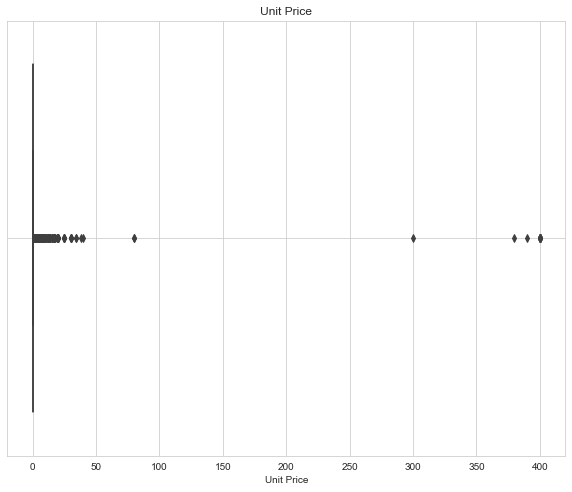

In [36]:
plt.subplots(figsize=(10,8))
sns.boxplot(df1.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [37]:
rslt_df = data2_new[data2_new['Price'] == 200]
print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


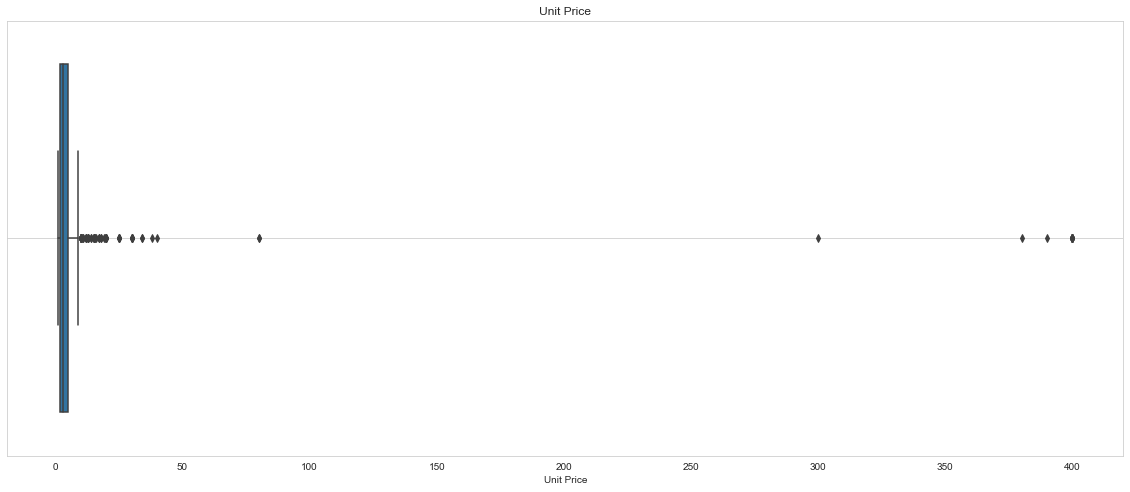

In [38]:
usful_df = df1[df1['Price'] != 0]
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [39]:
limit_data = df1[df1['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [41]:
limit_data.shape

(9338, 13)

b. Reviews column

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

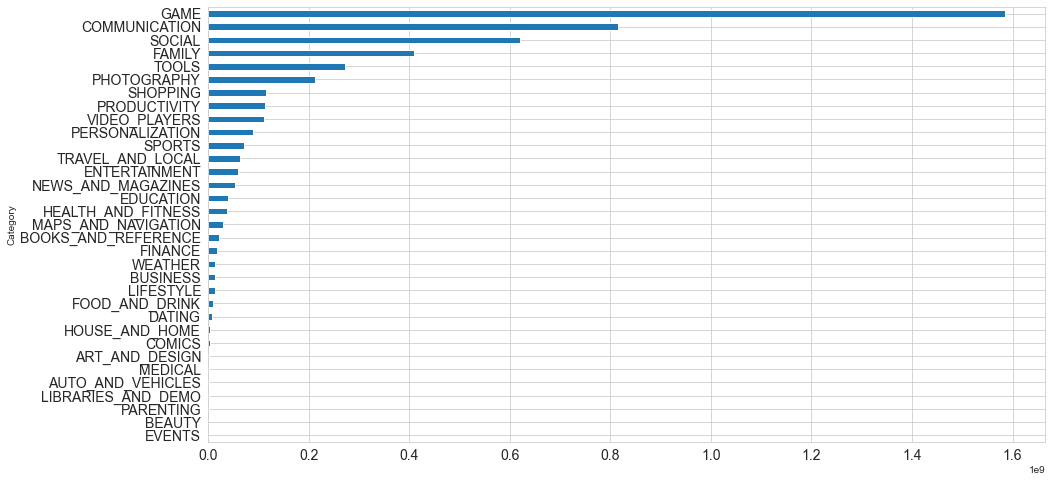

In [43]:
total=df1.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

In [45]:
limit_data_by_review = df1[df1['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [46]:
limit_data_by_review.shape

(8655, 13)

c. Installs

In [47]:
val = df1.Installs.quantile(0.95)
print(val)

100000000.0


In [49]:
x = df1.Installs.quantile() > val
print (x)

False


<b>Data analysis to answer business questions
    
5.What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?</b>


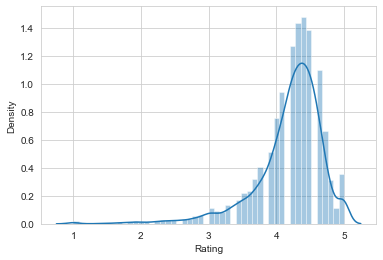

In [50]:
sns.distplot(df1['Rating'])
plt.show()


<b>B. What is the implication of this on your analysis?</b>
    
We see here that the rating is mostly concentrated between 3 and 5, Rating is our important parameter which tells how app is performing.

<b>6. What are the top Content Rating values?
    
A. Are there any values with very few records? </b>

In [51]:
df1['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

<b>B. If yes, drop those as they won’t help in the analysis</b>

In [52]:
Adult_rating = df1[df1['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df1[df1['Content Rating'] == 'Unrated'].index.to_list()
df1.drop(Adult_rating, inplace = True)
df1.drop(unrated, inplace = True)
df1['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [54]:
df1[(df1['Content Rating']=='Adults only 18+') | (df1['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<b>7.Effect of size on rating

    a.Make a joinplot to understand the effect of size on rating? 

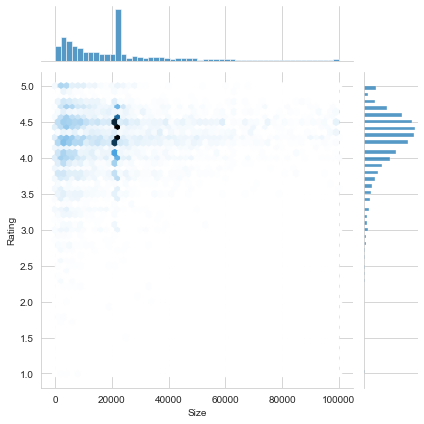

In [55]:
sns.jointplot(x=df1['Size'],y=df1['Rating'],data=df1,kind='hex')
plt.show()

<b>We can see that the relation B/W Ratings & Size in inversely proportional. As size increases ratings decreases and visa versa.

B. Do you see any patterns?
    
Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

C. How do you explain the pattern?

    Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

<b>8. Effect of price on rating
    
    A. Make a jointplot (with regression line)

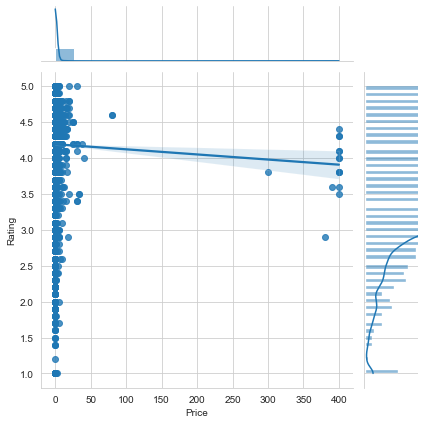

In [56]:
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg');
plt.xlim(-1,26);

<b>B. What pattern do you see?
    
     There is no significant change occur but there is slight increment.

<b>C. How do you explain the pattern?
    
    As per above graph i can say that there are more free app with more rating than compared to paid apps.

<b>D. Replot the data, this time with only records with price > 0

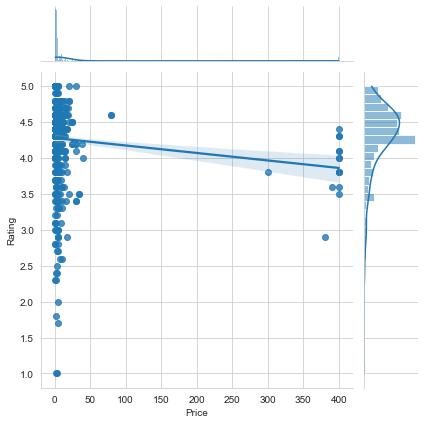

In [57]:
Price_greaterthan_zero = df1[df1['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

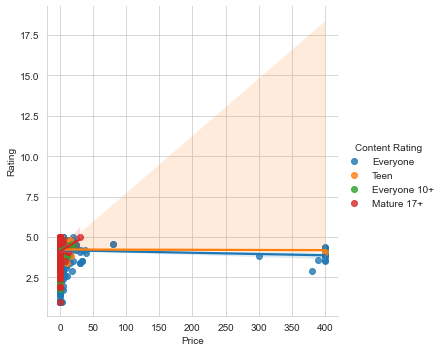

In [58]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df1)
plt.show()

<b>E. Does the pattern change?

    Yes, After apllying condition i can see a slightly negative correlation.

<b>F. What is your overall inference on the effect of price on the rating
 
    After seeing all the reults i can say that there is not much signifcant effect on Higher Rating.

<b>9. Look at all the numeric interactions together –

 <b> A. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

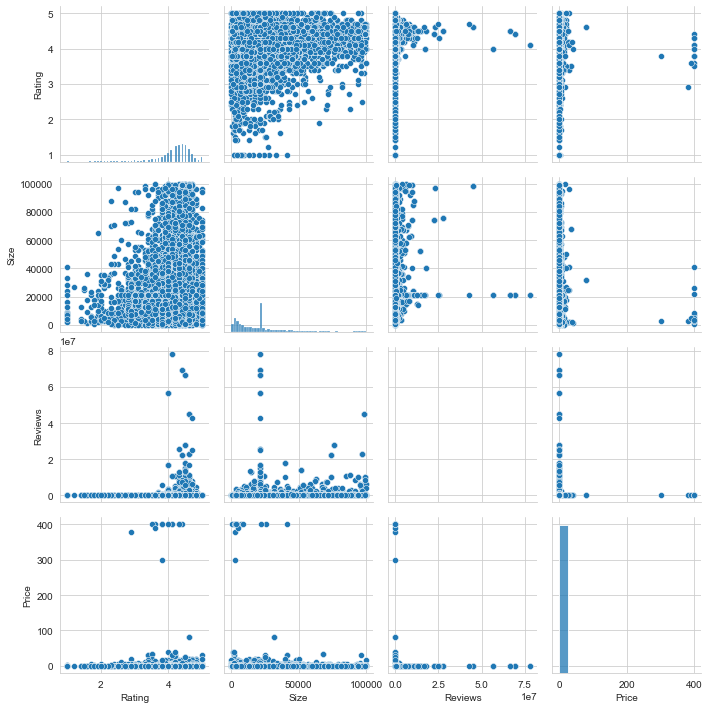

In [63]:
sns.pairplot(df1,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

<b>10. Rating vs. content rating
    
<b>A. Make a bar plot displaying the rating for each content rating

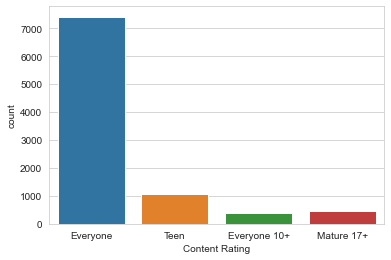

In [64]:
sns.countplot(x='Content Rating', data=df1);

<b>B. Which metric would you use? Mean? Median? Some other quantile?

   We must use Median in this case as we are having Outliers in Rating.I think median is the best measure of central tendency.

<b>C. Choose the right metric and plot

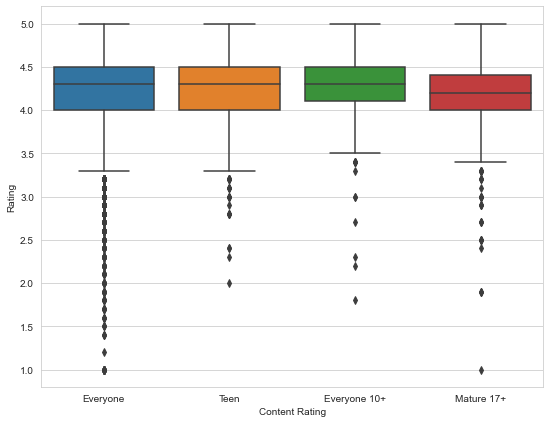

In [65]:
plt.figure(figsize=[9,7])
sns.boxplot(df1['Content Rating'],df1['Rating'])
plt.show()

<b>11. Content rating vs. size vs. rating – 3 variables at a time
    
<b>A. Create 5 buckets (20% records in each) based on Size

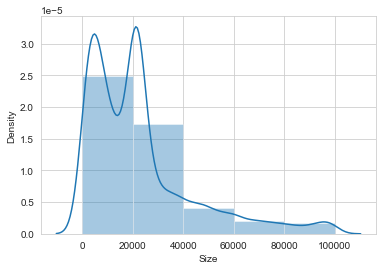

In [67]:
sns.distplot(df1["Size"], bins=5)
plt.show()

In [68]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df1['Size_Buckets'] = pd.cut(df1['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df1, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.224490
LOW,4.161317,4.207143,4.129592,4.209655
MED,4.242463,4.262602,4.091975,4.205630
HIGH,4.179122,4.209375,4.168333,4.213158
VERY HIGH,4.208134,4.287805,4.197170,4.279603


<b>b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination



In [69]:
df1.Size.quantile([0.2, 0.4,0.6,0.8])


0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [71]:
df1.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

<b>c. Make a heatmap of this

    i. Annotated
    ii. Greens color map

In [72]:
Size_Buckets =pd.pivot_table(df1, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


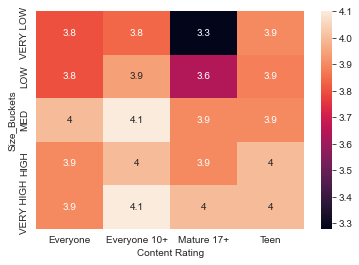

In [73]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

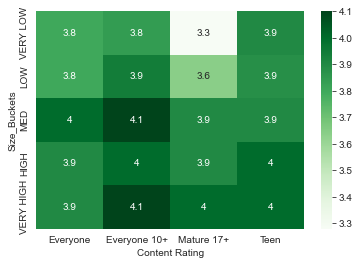

In [74]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

<b>D. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
    
No, We can not generallize by saying that but we can say that heavier apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories